In [2]:
from importlib import reload
from libs import io , cv2 , np

import preprocessing as pp
import roi as roi
import detection as detect
from classifier import H3T_Classifier


In [3]:

reload(roi)
reload(detect)



<module 'detection' from 'd:\\IP\\project\\real\\full_pipeline\\detection.py'>

In [4]:
# INIT

sign_imgs_corr = detect.get_corrleation_matrices("../dataset/corr_signs")


In [5]:

classifier = H3T_Classifier()


In [6]:
classifier.prepare_training_data("../dataset/road_sign_dataset/training_set")
classifier.train("svm")


9379 9379


In [7]:

classifier.save_trained_model()

In [ ]:

classifier.load_trained_model()




In [8]:
# Load the image



image = io.imread("../dataset/road_sign_dataset/training_set/speed_50/50 (120).png")


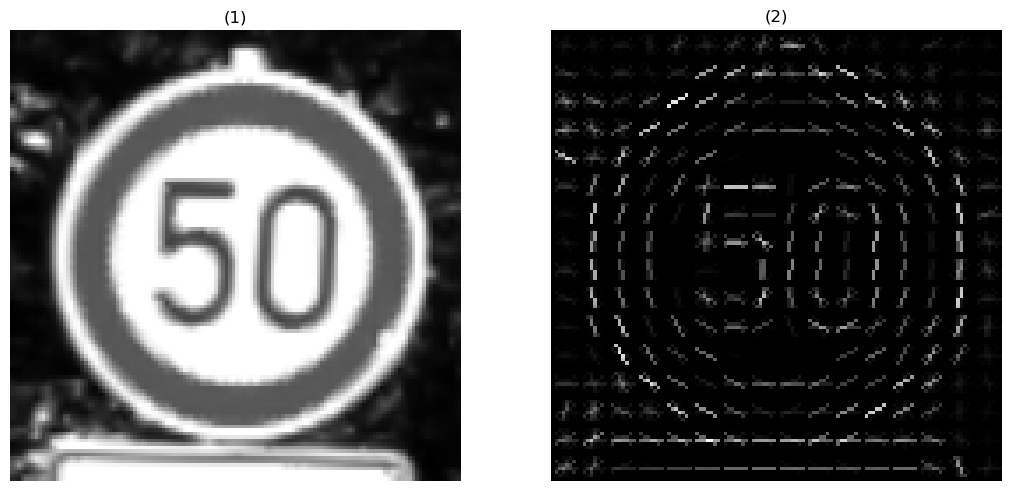

In [9]:
from skimage.feature import hog
resized_img = cv2.resize(image, (128, 128))
gray_image = pp.gray_image(resized_img)   
feature_vector , transformed_hog = hog(gray_image , visualize = True  , pixels_per_cell=(8 , 8) , cells_per_block=(4 , 4) , transform_sqrt=True)
pp.show_images([gray_image, transformed_hog])



In [83]:
image = io.imread("../dataset/pp/testcase10.png")

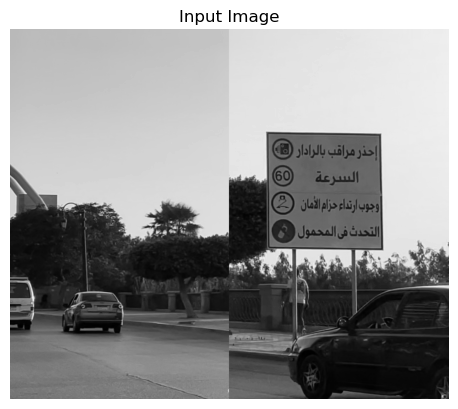

In [84]:

image = cv2.resize(image, (1280, 720))

#pp.show_images([image], ["Input Image"])

cropped_img = cv2.hconcat([image[:, :(image.shape[1] // 3)]  , image[:, 2 * (image.shape[1] // 3):]])

# Convert the image to grayscale
gray_image = pp.gray_image(cropped_img)

equalized_image = pp.HistogramEqualization(gray_image)

# Apply edge detection
edge_image = pp.LoGEdgeDetection(equalized_image)

# show pp images
pp.show_images([gray_image], ["Input Image", "Cropped Image", "Edge Image"])


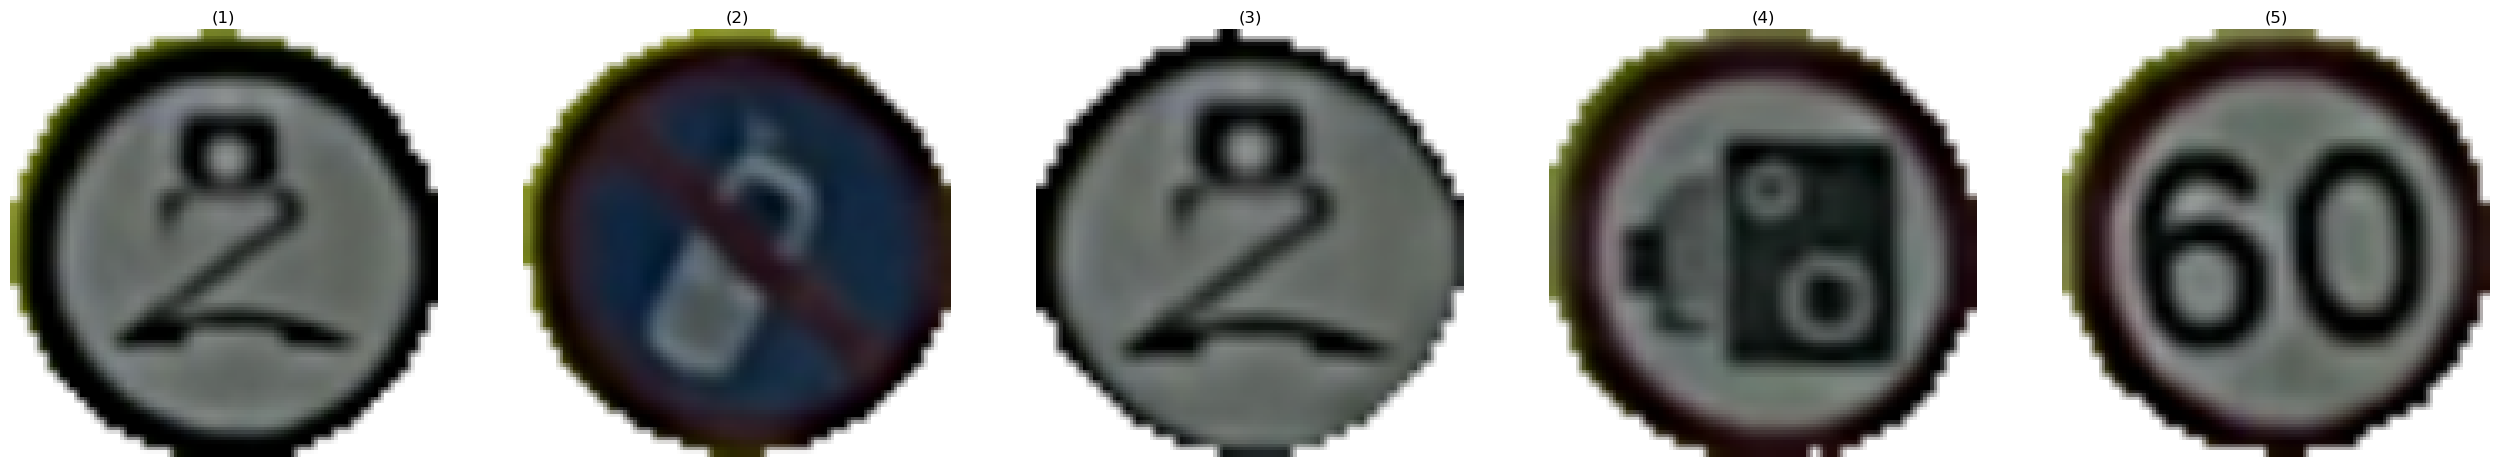

In [85]:

# Extract ROIs
rois = roi.extract_roi(edge_image , cropped_img)

# print(rois[0].shape)
#show rois

# new_images = []
# for i in range(len(rois)):
#     #  rois[i] = pp.gray_image(rois[i])
#      new_images.append(pp.HistogramEqualization(rois[i]))

pp.show_images(rois)

0.3222275430754146
0.27159155528508583
0.26745187069967213
0.33009064828309576
0.30110134486250256
0.3162975440165513
[1, 0, 0, 0, 5]
4


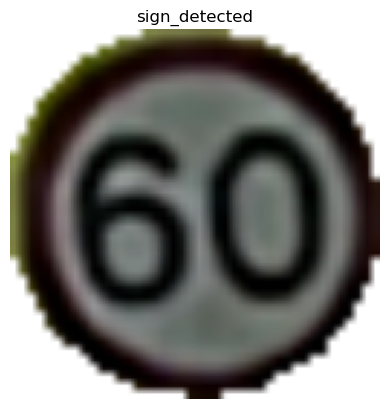

prediction is ['30']


In [86]:
if (len(rois)  == 0):
    print("no rois")
else:
    detected_image_index = detect.detect_sign(rois, sign_imgs_corr)
    print(detected_image_index) 
    if detected_image_index != -1:
        
        # feature_vector , transformed_hog = hog(rois[detected_image_index] , visualize = True , channel_axis=2  , pixels_per_cell=(16, 16) , transform_sqrt=True)
        # pp.show_images([rois[detected_image_index], transformed_hog])
        
        # gray_roi = pp.gray_image(rois[detected_image_index])
        
        # gray_roi = pp.HistogramEqualization(gray_roi)
        pp.show_images([rois[detected_image_index]], ["sign_detected"])
        
        # print(gray_roi.shape)
        print(f'prediction is {classifier.predict(rois[detected_image_index])}')
    else:
        print("no sign detected")


